In [1]:
pip install pandas matplotlib scikit-learn tensorflow

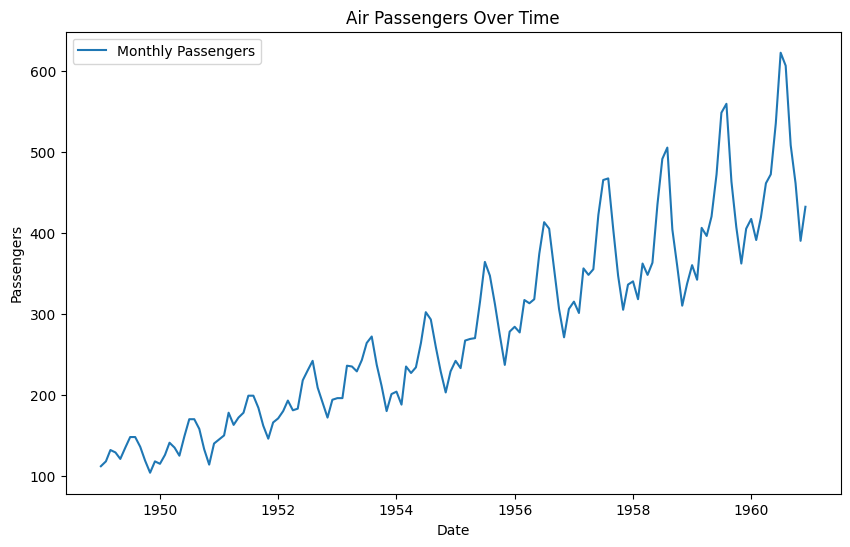

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0380 - val_loss: 0.0214
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0145 - val_loss: 0.0224
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - val_loss: 0.0479
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0107 - val_loss: 0.0260
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0077 - val_loss: 0.0213
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0071 - val_loss: 0.0222
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0066 - val_loss: 0.0222
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0064 - val_loss: 0.0209
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0066 - val_loss: 0.0213
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0060 - val_loss: 0.0206
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0065 - val_loss: 0.0206
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0065 - val_l

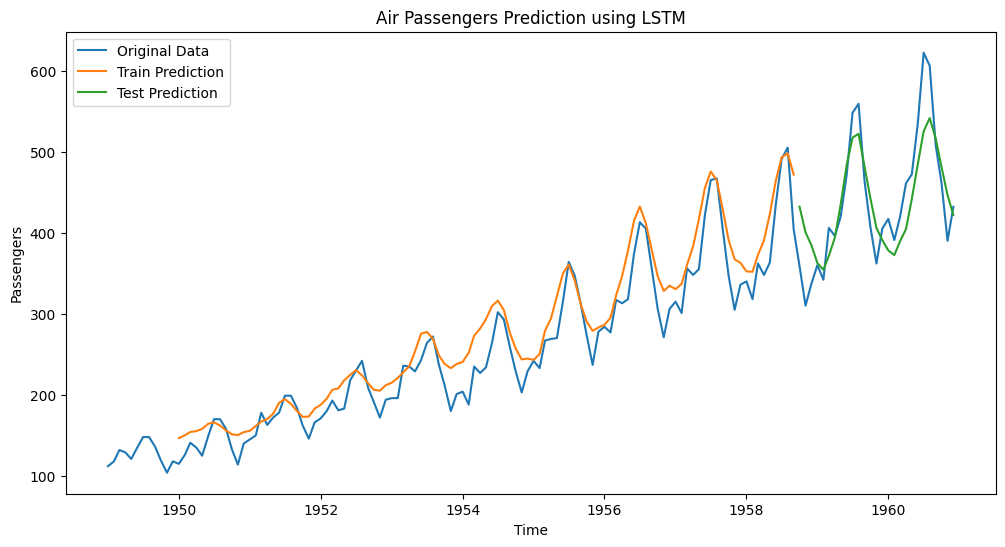

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Loading Dataset
df = pd.read_csv('/content/AirPassengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizing Data
plt.figure(figsize=(10,6))
plt.plot(df, label='Monthly Passengers')
plt.title("Air Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Normalizing Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Creating Sequences for Supervised Learning
def create_sequences(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_sequences(data_scaled, time_step)

# Spliting into Training and Testing Sets
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Building the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # 1) Explicit Input layer declares the shape
    Input(shape=(time_step, 1)),

    # 2) First LSTM no longer needs input_shape
    LSTM(64, return_sequences=True),

    # 3) Second LSTM
    LSTM(32),

    # 4) Final dense output
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# Training the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Making Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse Transform the Predictions
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Plotting the Predictions
plt.figure(figsize=(12,6))
# Original data
plt.plot(df.index, scaler.inverse_transform(data_scaled), label='Original Data')

# Training predictions
train_dates = df.index[time_step:split+time_step]
plt.plot(train_dates, train_predict_inv, label='Train Prediction')

# Testing predictions
test_dates = df.index[split+time_step:]
plt.plot(test_dates, test_predict_inv, label='Test Prediction')

plt.title('Air Passengers Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()
